파이썬 머신러닝 완벽가이드 ch7. 1 ~ 2 pg. 409 ~ 427

---

# CHAPTER 07 군집화

## 01 K-평균 알고리즘 이해

- 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
1, 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평쥰 지점으로 이동하는 프로세스를 반복적으로 수행.
2. 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화하는 기법


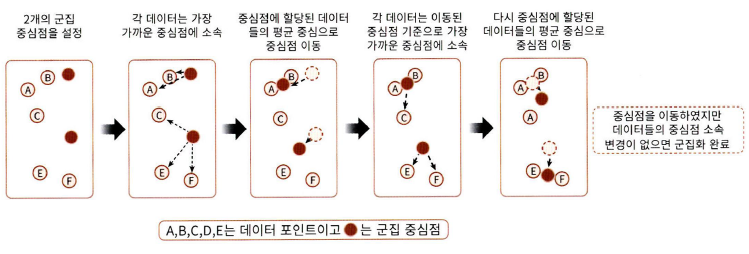

1. 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 쉽고 산결
2. 단점
- 거리 기반 알고리즘으로 속서의 개수가 만흐면 군집화 정확도가 떨어진다.
- 반복 횟수가 많을경우 수행 시간이 느려짐.
- 몇 개의 군집을 선택해야 할 지 가이드하기 어렵다.

### 사이킷런 KMeans 클래스 소개

class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

중요한 파라미터
- n_clusters : 군집화할 개수(군집 중심점의 개수)
- init : 군집 중심점의 좌표를 설저한 방식, 보통은 임의로 중심을 설정하지 않고 일반저그로 k-means++ 방식으로 최초 설정
- max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

fit 또는 fit_trainform 메서드를 이용 수행 -> 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있다.
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표, 시각화 가능

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


- labels_ 속성값 : irisDF의 각 데이터가 어떤 중심에 속하는지 알 수 있다.

In [4]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count() #개수비교하기 위해
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 타깃이 0값인 데이터는 1번 군집으로 모두 잘 그루핑 됐다.
- Target 1 값 데이터는 2개만 2번 군집으로 그루핑, 나머지 48개는 모두 0번 군집으로 그루핑, 하지만 2값 데이터는 0번 군집에 14개, 2번 군집에 26개로 분산돼 그루핑 되었다.

시각화를 해보자.

In [5]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


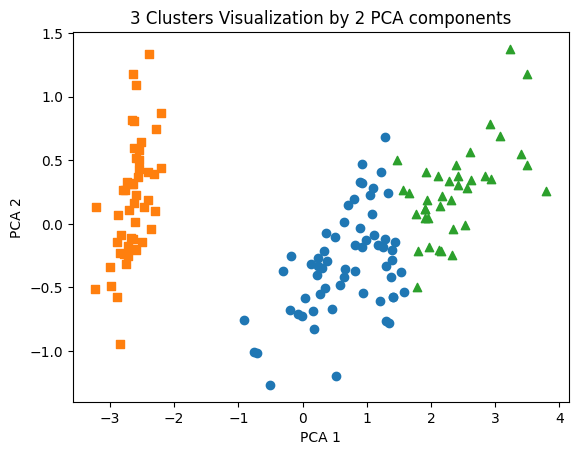

In [6]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출.o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA components')
plt.show()

- Cluster 1을 나타내는 네모는 명확히 다른 군집과 잘 분리되어 있다.

### 군집화 알고리즘 테스트를 위한 데이터 생성

군집화용 데이터 생성기
- make_blobs()
- make_classification()
- (공통점)
>- 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성할 수 있다.
>- 분류 죵도로도 테스트 데이터 생성 가능
- (차이점)
> - make_bolbs() : 개별 군집의 중심점과 표준 편차 제어 기능이 추가
>- make_classification() : 노이즈를 포함한 데이터를 만드는데 유용하게 사용

make_bolbs() 의 파라미터
- n_samples : 생성할 총 데이터의 개수, dafault = 100
- n_feature : 데이터의 피처 개수 / 시각화를 목표로 한다면 2개로 설정해 첫 번째 피처는 x 좌표, 두 번째 치처는 y 좌표상에 표현
- centers : int 값으로 설정하면 군집의 개수, ndarray 형태로 나타내면 개별 군집 중심점의 좌표 의미
- cluster_std : 생성될 군집 데이터의 표준 편차 의미

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)
# y target 값의 분포를 확인
unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지르모 shape은 (200,2), 군집 타깃 데이터 세트인 y의 shape은 (200,) 그리고 3개의 cluster의 값은 [0,1,2]이며 각각 67개 67개 66개로 균일하게 구성되어 있다.

In [8]:
# 데이터프레임으로 변환
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


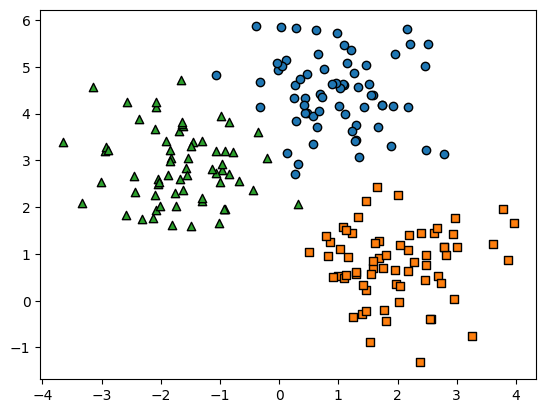

In [9]:
target_list=np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o','s','^','P','D','H','x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0,target==1,target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

KMeans 군집화를 수행한 뒤에 군집별로 시각화 해보자.
- fit_predict(X)를 수행해 make_bolbs()의 피처 데이터 세트인 X 데이터를 군집화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


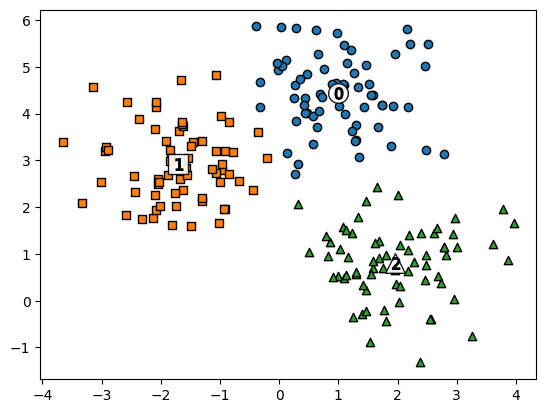

In [10]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# 군집된 label유형별로 iteration 하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
              marker=markers[label])

  # 군집 별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
              marker='$%d$'%label)

plt.show()

In [11]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- 대부분 잘 매핑되었다.

## 02 군집 평가(Cluster Evaluation)

- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않는다.
- 분류와 유사해 보일 수 있으나 성격이 다르다.
- 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 가지고 있다.
- 대표적인 성능 평가 방법 : 실루엣 분석

### 실루엣 분석 개요

각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지
- 효율적으로 잘 분리됐다 : 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 저도의 여유공간을 가지고 떨어져 있을 것.

실루엣 계수를 기반으로
- 실루엣 계수 : 개별 데이터가 가지는 군집화 지표

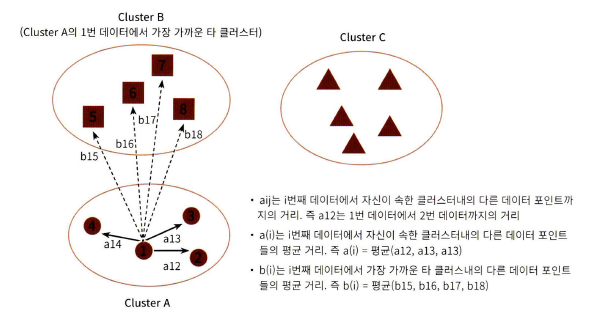

데이터 포인트의 실루엣 계수 값은 a(i)와 b(i)를 기반으로 계산
- a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
- b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
- 두 군집 간의 거리가 얼마나 떨어져 있는가 : b(i) - a(i)
- 이를 정규화 하기 위해 Max(a(i),b(i)) 값으로 나눈다.
- s(i) : i번째 데이터 포인트의 실뤳 계수 값

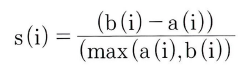

실루엣 계수
- -1에서 1 사이의 값을 가진다.
- 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것, 0으로 가까울수록 근처의 군집과 가까워진다는 것
- -값은 아예 다른 군집에 데이터 포인트가 할당됐음.

실루엣 분석을 위해 제공되는 메서드
- sklearn.metrics.silhouette_samples(X,labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환

좋은 군집화의 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1사이 값을 갖고, 1에 가까울수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 시루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [12]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster']=kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff']=score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score=silhouette_score(iris.data,irisDF['cluster'])
print('붓꽃 데이터 세트 silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


- 평균 실루엣 계수 값 : 약 0.553
- 1번 군집의 경우 0.8 이상의 높은 실루엣 계수 값을 나타낸다. 1번 군집이 아닌 다른 군집의 경우 실루엣 계수 값이 평균보다 낮기 때문이다.

In [13]:
# 군집별 평균 실루엣 계수 값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 1번 군집은 실루엣 계수 평균 값이 약 0.79인데 반해, 0번은 약 0.41, 2번은 0.45로 사대적으로 평균 값이 1번에 비해 낮다.

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘됐다고 볼 수는 없다. 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가질 수 있다.

visualize_sihouette()
- 내부 파라미터로 여러 개의 군집 개수를 리스트로 가지는 첫 번째 파라미터와 피처 데이터 세트인 두 번째 파라미터를 가지고 있다.

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

In [15]:
def visualize_silhouette(cluster_lists, X_features):

    # 입력값으로 클러스 터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

피처 데이터 세트 X_features에 대해 군집이 2개일 때와 3개, 4개, 5개일 때의 군집별 평균 실루엣 계수 값을 알고 싶다면 다음과 같이 호출하면 된다.
> visualize_silhouette([2,3,4,5], X_features)

In [16]:
# make_blobs()를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


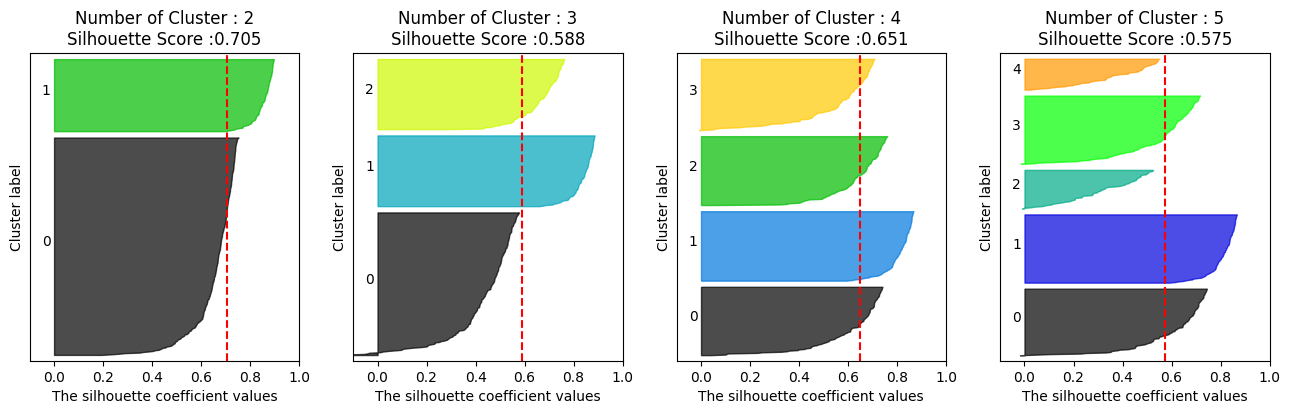

In [17]:
# 군집 개수가 2개,3개,4개,5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

- 4개의 군집일때가 가장 최적이 됨을 알 수 있다

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


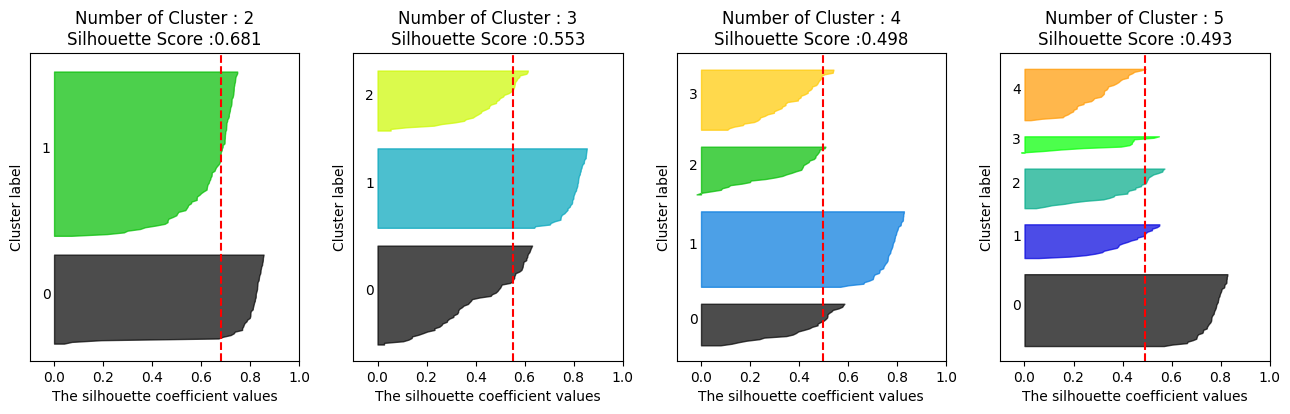

In [18]:
# 붓꽃 데이터를 이용해 K-평균 수행시 최적의 군집 개수 알아보기
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5],iris.data)

- 2개의 군집이 가장 좋아보인다.

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로 데이터 양이 늘어나면 수행 시간이 크게 늘어난다.